<a href="https://colab.research.google.com/github/mooniewexx/NLP/blob/main/nlp_1_classic_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнила: `Кызыл-оол Монгун-Ай ПМ22-6`

# Базовая обработка текста

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://www.nltk.org/api/nltk.html
* https://pymorphy2.readthedocs.io/en/stable/
* https://docs.python.org/3/library/re.html
* https://regex101.com/

## Задачи для совместного разбора

1. Найдите все суммы (число плюс валюта), которые упоминаются в данном тексте. Выведите результат в виде списка кортежей из двух элементов (число, валюта)

In [ ]:
text = '''During my trip to Europe, I exchanged $10.50 for €20,00 at the currency exchange booth.
With ¥5000, I bought some souvenirs from a local market.
Later, I treated myself to a delicious meal at a restaurant, which cost me £15,99.
Finally, I converted 100₹ into the local currency to buy a traditional Indian artwork.'''

In [ ]:
import re

re.findall(r"([$€¥₹£])(\d+[.,]?\d+)", text)

[('$', '10.50'), ('€', '20,00'), ('¥', '5000'), ('£', '15,99')]

2\. Выясните, встречается ли в представленном фрагменте текста тавтология.

In [ ]:
text = '''
Вода - это жидкость, которая имеет свойство быть водой.
Она состоит из молекул, которые образуют воду.
Вода, будучи водой, обладает свойствами, характерными для воды.
Ее молекулы, составляющие воду, образуют воду, которая является водой.
Таким образом, вода, будучи водой, является водой.
'''

In [ ]:
text.split()

['Вода',
 '-',
 'это',
 'жидкость,',
 'которая',
 'имеет',
 'свойство',
 'быть',
 'водой.',
 'Она',
 'состоит',
 'из',
 'молекул,',
 'которые',
 'образуют',
 'воду.',
 'Вода,',
 'будучи',
 'водой,',
 'обладает',
 'свойствами,',
 'характерными',
 'для',
 'воды.',
 'Ее',
 'молекулы,',
 'составляющие',
 'воду,',
 'образуют',
 'воду,',
 'которая',
 'является',
 'водой.',
 'Таким',
 'образом,',
 'вода,',
 'будучи',
 'водой,',
 'является',
 'водой.']

In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt_tab')  # tokenizer dlya ru

word_tokenize(text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Вода',
 '-',
 'это',
 'жидкость',
 ',',
 'которая',
 'имеет',
 'свойство',
 'быть',
 'водой',
 '.',
 'Она',
 'состоит',
 'из',
 'молекул',
 ',',
 'которые',
 'образуют',
 'воду',
 '.',
 'Вода',
 ',',
 'будучи',
 'водой',
 ',',
 'обладает',
 'свойствами',
 ',',
 'характерными',
 'для',
 'воды',
 '.',
 'Ее',
 'молекулы',
 ',',
 'составляющие',
 'воду',
 ',',
 'образуют',
 'воду',
 ',',
 'которая',
 'является',
 'водой',
 '.',
 'Таким',
 'образом',
 ',',
 'вода',
 ',',
 'будучи',
 'водой',
 ',',
 'является',
 'водой',
 '.']

In [ ]:
from nltk.tokenize import RegexpTokenizer # токенизаторы с использованием регулярных выражений

tokenizer = RegexpTokenizer("\w+") # буквы и цифры
tokens = tokenizer.tokenize(text.lower())
tokens[:5]

['вода', 'это', 'жидкость', 'которая', 'имеет']

In [ ]:
from collections import Counter

Counter(tokens).most_common()

[('водой', 5),
 ('вода', 3),
 ('воду', 3),
 ('которая', 2),
 ('образуют', 2),
 ('будучи', 2),
 ('является', 2),
 ('это', 1),
 ('жидкость', 1),
 ('имеет', 1),
 ('свойство', 1),
 ('быть', 1),
 ('она', 1),
 ('состоит', 1),
 ('из', 1),
 ('молекул', 1),
 ('которые', 1),
 ('обладает', 1),
 ('свойствами', 1),
 ('характерными', 1),
 ('для', 1),
 ('воды', 1),
 ('ее', 1),
 ('молекулы', 1),
 ('составляющие', 1),
 ('таким', 1),
 ('образом', 1)]

In [ ]:
stemmer = nltk.stem.SnowballStemmer("russian")
stemmed_tokens = [stemmer.stem(token) for token in tokens]
Counter(stemmed_tokens).most_common()

[('вод', 12),
 ('котор', 3),
 ('образ', 3),
 ('свойств', 2),
 ('молекул', 2),
 ('будуч', 2),
 ('явля', 2),
 ('эт', 1),
 ('жидкост', 1),
 ('имеет', 1),
 ('быт', 1),
 ('он', 1),
 ('состо', 1),
 ('из', 1),
 ('облада', 1),
 ('характерн', 1),
 ('для', 1),
 ('е', 1),
 ('составля', 1),
 ('так', 1)]

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

### 1\. Исследуйте, какие формы слов встречаются в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Сгруппируйте слова по начальной форме и представьте результата в виде словаря, где ключом является начальная форма слова, а значением - список форм этого слова, которые встретились в тексте. Выведите на экран набор слов, для которых начальными формами являются "кот" или "кошка".

- [ ] Проверено на семинаре

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Лучше кошки зверя нет 2.csv', encoding="utf-8", header = None)
data[:5]

,0,1,2
0,http://forum.moya-semya.ru/index.php?app=forum...,Завтра мои котейки идут к врачу. А 21-го жду и...,Unknown
1,http://forum.moya-semya.ru/index.php?app=forum...,Котя скучает по мужу. Со вторника спит на его ...,Unknown
2,http://forum.moya-semya.ru/index.php?app=forum...,"Получилось так, что мне пришлось ""отдать"" мою ...",Unknown
3,http://forum.moya-semya.ru/index.php?app=forum...,Лучше всего для начала спросить об этом у люде...,Unknown
4,http://forum.moya-semya.ru/index.php?app=forum...,"что волонтеры принесут, то и насыпалиЗначит, к...",Unknown


In [ ]:
data[1][0]

'Завтра мои котейки идут к врачу. А 21-го жду их домой. Прошу помощи. Чем кормить лучше (корм). Какой наполнитель использовать. Коты год жили на передержке. Любым советам буду благодарна.Лучше всего для начала спросить об этом у людей, где жили коты. За год коты явно привыкли к определенному наполнителю. \xa0А дальше по обстоятельствам.Удачи! Коты - это счастье!'

In [ ]:
text = ' '.join(data[1].dropna().tolist())
text

'Завтра мои котейки идут к врачу. А 21-го жду их домой. Прошу помощи. Чем кормить лучше (корм). Какой наполнитель использовать. Коты год жили на передержке. Любым советам буду благодарна.Лучше всего для начала спросить об этом у людей, где жили коты. За год коты явно привыкли к определенному наполнителю. \xa0А дальше по обстоятельствам.Удачи! Коты - это счастье! Котя скучает по мужу. Со вторника спит на его тапках. \xa0Машина стоит на парковке во дворе, кот ходит вокруг \xa0и вопит. \xa0Я открыла машину, доставала документы \xa0и продукты, Котя просочился \xa0внутрь и уселся на переднее сидение. Сел и сидит. Типа поехали, хотела вытащить, а он когтями в кожу и упирается. Так и сидел минут 10. Потом дошло, что никуда не поедет, расстроился, вылез, заныл и свалил в туман.Муж тоже скучает по коту. Ну и ехидненько так, сколько сегодня трупаков припер? Закапываешь, или так швыряешь?За одну " хорошую ночь" 3 мыша. Если охота не удалась 1 мышь. Если дождь, у меня щасье, Котя дома спит. Получи

In [ ]:
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(text.lower())
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['завтра', 'мои', 'котейки', 'идут', 'к', 'врачу', 'а', '21', 'го', 'жду']

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.5 MB/s eta 0:00:00


In [ ]:
import pymorphy2
from collections import defaultdict

morph = pymorphy2.MorphAnalyzer()

# группирую по начальной форме
word_forms = defaultdict(set) # defaultdict(set, {})


for token in tokens:
    lemma = morph.parse(token)[0].normal_form  # нач ф
    word_forms[lemma].add(token)  # форма слова к лемме

word_forms = {key: list(forms) for key, forms in word_forms.items()} # множества в списки
word_forms

{'завтра': ['завтра'],
 'мой': ['моего',
  'моим',
  'мои',
  'моя',
  'мое',
  'моем',
  'моём',
  'моему',
  'моими',
  'моих',
  'мою',
  'мой',
  'моё',
  'моей'],
 'котейка': ['котейке',
  'котеек',
  'котейку',
  'котейками',
  'котейка',
  'котейки'],
 'идти': ['идут',
  'шел',
  'идёт',
  'иди',
  'шла',
  'шёл',
  'идёте',
  'идти',
  'идем',
  'идите',
  'идете',
  'идешь',
  'идет',
  'идущему',
  'идёшь',
  'шло',
  'шли',
  'иду',
  'идущие',
  'идём'],
 'к': ['ко', 'к'],
 'врач': ['врача', 'врачу', 'врачам', 'врачей', 'врачи', 'врач'],
 'а': ['а'],
 '21': ['21'],
 'го': ['го'],
 'ждать': ['ждём',
  'ждете',
  'ждать',
  'ждала',
  'ждал',
  'ждут',
  'ждет',
  'ждёт',
  'жду',
  'ждем',
  'ждали'],
 'они': ['им', 'ним', 'их', 'ими', 'они', 'ними', 'них'],
 'домой': ['домой'],
 'просить': ['просить',
  'проси',
  'прошу',
  'просите',
  'просят',
  'просила',
  'просит',
  'просил',
  'прося',
  'просишь',
  'просили'],
 'помощь': ['помощью', 'помощи', 'помощь'],
 'чем': [

In [ ]:
cats = {lemma: forms for lemma, forms in word_forms.items() if lemma in ["кот", "кошка"]}

cats

{'кот': ['кот',
  'коты',
  'котам',
  'котах',
  'котов',
  'коте',
  'коту',
  'котами',
  'кота',
  'котом'],
 'кошка': ['кошек',
  'кошкой',
  'кошкою',
  'кошка',
  'кошки',
  'кошками',
  'кошку',
  'кошке',
  'кошкам']}

In [ ]:
for lemma, forms in cats.items():
    print(f"нач ф: {lemma}, её формы: {forms}")

нач ф: кот, её формы: ['кот', 'коты', 'котам', 'котах', 'котов', 'коте', 'коту', 'котами', 'кота', 'котом']
нач ф: кошка, её формы: ['кошек', 'кошкой', 'кошкою', 'кошка', 'кошки', 'кошками', 'кошку', 'кошке', 'кошкам']


<p class="task" id="2"></p>

### 2\. Получите и выведите на экран набор имён питомцев, упомянутых в текстах из файла `moya-semia/Лучше кошки зверя нет 2.csv`. Для простоты считайте, что имя питомца начинается с заглавной буквы и стоит не в начале предложения.

In [ ]:
import re

# имя начинается с заглавной буквы, стоит не в начале предложения - предшествуется пробелом или любым знаком препинания
pet_names = re.findall(r"(?<![.!?])\s([А-ЯЁ][а-яё]+)", text)

unique_pn = sorted(set(pet_names)) # - дубликаты и сорт список
unique_pn

['Абамой',
 'Авито',
 'Ага',
 'Адвантайджем',
 'Азнавур',
 'Акоп',
 'Акопа',
 'Акопом',
 'Алекс',
 'Алена',
 'Алиска',
 'Алисы',
 'Амазономахия',
 'Андрей',
 'Андрею',
 'Анна',
 'Анфиса',
 'Анфису',
 'Анютины',
 'Апина',
 'Артура',
 'Асей',
 'Асенькой',
 'Аси',
 'Ассоль',
 'Астраханская',
 'Астраханской',
 'Асю',
 'Ася',
 'Ах',
 'Бадя',
 'Бакс',
 'Банзай',
 'Банзая',
 'Бант',
 'Барбра',
 'Барбру',
 'Барс',
 'Барса',
 'Барсик',
 'Барсика',
 'Баскервилей',
 'Батыр',
 'Батыра',
 'Бегги',
 'Бедный',
 'Белка',
 'Белле',
 'Белочку',
 'Белый',
 'Бельча',
 'Бельчик',
 'Бельчу',
 'Беляш',
 'Беляша',
 'Беляшик',
 'Беляшка',
 'Беляшом',
 'Беляшу',
 'Бесполезно',
 'Ближний',
 'Близнец',
 'Бог',
 'Богииии',
 'Богу',
 'Боже',
 'Божья',
 'Болгарии',
 'Более',
 'Большая',
 'Большую',
 'Боня',
 'Борис',
 'Бориса',
 'Брунгильдой',
 'Бруней',
 'Брут',
 'Бублик',
 'Будильник',
 'Будильничек',
 'Будит',
 'Буду',
 'Букет',
 'Бумер',
 'Бурчащего',
 'Бусе',
 'Бусей',
 'Бусена',
 'Бусене',
 'Бусина',
 'Буська'

<p class="task" id="3"></p>

### 3\. Вычислите среднюю длину сообщения (в количестве предложений) в различных темах форума газеты "Моя Семья" (каждый файл из каталога `data/moya-semia` соответствует отдельной теме". Представьте результат в виде столбчатой диаграммы. Подпишите рисунок и дайте названия осям.  

In [ ]:
def count_pred(text):
    sentences = re.split(r"[.!?]+", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    return len(sentences)

In [ ]:
text = 'Завтра мои котейки идут к врачу. А 21-го жду их домой. Прошу помощи. Чем кормить лучше (корм). Какой наполнитель использовать. Коты год жили на передержке. Любым советам буду благодарна.Лучше всего для начала спросить об этом у людей, где жили коты. За год коты явно привыкли к определенному наполнителю.  А дальше по обстоятельствам.Удачи! Коты - это счастье!'

In [ ]:
import re
sentences = re.split(r"[.!?]+", text)

In [ ]:
sentences

['Завтра мои котейки идут к врачу',
 ' А 21-го жду их домой',
 ' Прошу помощи',
 ' Чем кормить лучше (корм)',
 ' Какой наполнитель использовать',
 ' Коты год жили на передержке',
 ' Любым советам буду благодарна',
 'Лучше всего для начала спросить об этом у людей, где жили коты',
 ' За год коты явно привыкли к определенному наполнителю',
 ' \xa0А дальше по обстоятельствам',
 'Удачи',
 ' Коты - это счастье',
 '']

In [ ]:
sentences[1].strip()

'А 21-го жду их домой'

In [ ]:
[s.strip() for s in sentences if s.strip()]

['Завтра мои котейки идут к врачу',
 'А 21-го жду их домой',
 'Прошу помощи',
 'Чем кормить лучше (корм)',
 'Какой наполнитель использовать',
 'Коты год жили на передержке',
 'Любым советам буду благодарна',
 'Лучше всего для начала спросить об этом у людей, где жили коты',
 'За год коты явно привыкли к определенному наполнителю',
 'А дальше по обстоятельствам',
 'Удачи',
 'Коты - это счастье']

In [ ]:
sentences = re.split(r"[.!?]+", text)
len([s.strip() for s in sentences if s.strip()])

18362

In [ ]:
[text for text in data[1].dropna()][0]

'Завтра мои котейки идут к врачу. А 21-го жду их домой. Прошу помощи. Чем кормить лучше (корм). Какой наполнитель использовать. Коты год жили на передержке. Любым советам буду благодарна.Лучше всего для начала спросить об этом у людей, где жили коты. За год коты явно привыкли к определенному наполнителю. \xa0А дальше по обстоятельствам.Удачи! Коты - это счастье!'

In [ ]:
counts = [count_pred(raw) for raw in data[1].dropna()]
counts[:5]

[12, 14, 4, 5, 8]

In [ ]:
import os
import matplotlib.pyplot as plt

dir = "/content/data/moya-semia"

avg_lengths = {}

for f in os.listdir(dir):
    if f.endswith(".csv"):

        f_path = os.path.join(dir, f)
        data = pd.read_csv(f_path, encoding="utf-8", header=None)

        counts = [count_pred(raw) for raw in data[1].dropna()]

        avg = sum(counts) / len(counts) if counts else 0 # ср дл предл
        avg_lengths[f.replace('.csv', '')] = avg

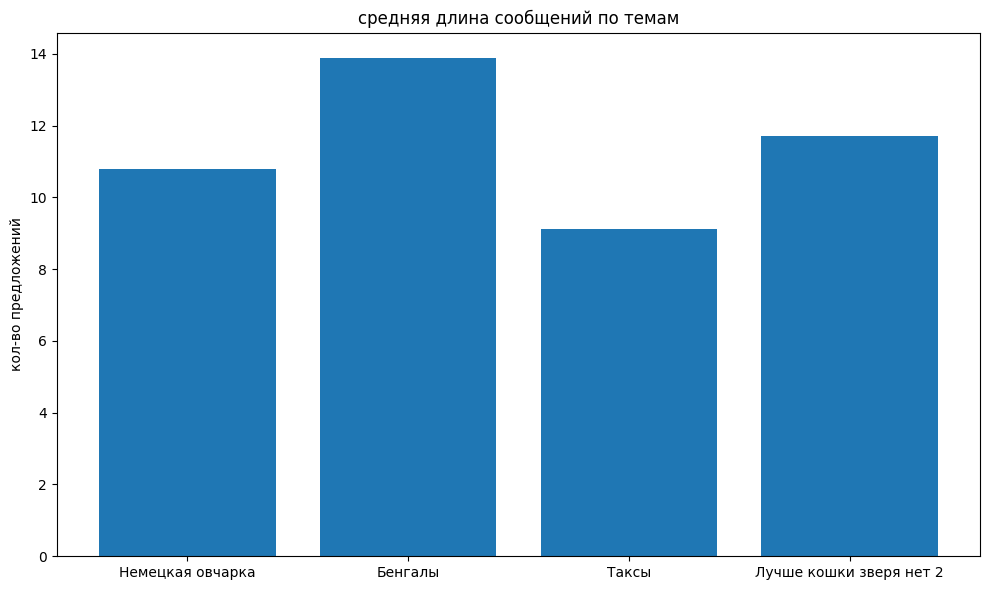

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(avg_lengths.keys(), avg_lengths.values())
plt.title("cредняя длина сообщений по темам")
plt.ylabel("кол-во предложений")
plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

### 4\. Замените все текстовые смайлики из файла `livejounal/психология.csv` на соответствующие символы юникода. Для поиска смайликов воспользуйтесь регулярными выражениями. Ниже представлен список (не исчерпывающий) примеров возможных смайликов и символ, на который их нужно заменить:

* :=), =-), =-))), ))) и т.д. -> \u263A
* ;), ;-), ;-)) и т.д. -> \U0001F609
* :D, :-D, =-D, =-DDD и т.д. -> \U0001F600
* :=(, :-(, =-(((, (((, ;-( и т.д. -> \U0001F641

In [ ]:
import pandas as pd

data = pd.read_csv('/content/психология.csv', encoding="utf-8")
data[:5]

,url,author,likes,text,comments
0,https://marikarai.livejournal.com/860.html?media,https://marikarai.livejournal.com/,23,"Выход из депрессии....\nСегодня, 24 марта, Меж...","['Спасибо за полезный пост! Кажется, что сейча..."
1,https://psychologies.livejournal.com/18496.htm...,https://psychologies.livejournal.com/,17,"Избегание, агрессия, пессимизм: 22 признака де...","['Знаете, я нашла в Вашем посте более сотни пр..."
2,https://kornilovasasha.livejournal.com/1458.ht...,https://kornilovasasha.livejournal.com/,67,"""Я чувствую, что не надо ехать"" - этого достат...",['Здравствуйте! Система категоризации Живого Ж...
3,https://rmnt-official.livejournal.com/118486.h...,https://rmnt-official.livejournal.com/,15,Пять причин беспорядка в доме и способы борьбы...,['Основных причин невозможности содержать в по...
4,https://kornilovasasha.livejournal.com/986.htm...,https://kornilovasasha.livejournal.com/,48,"Чувство Дома.\nКак эта шутка... ""Ты где?"" - ""Д...",['Ваша запись Чувство Дома в LiveJournal Media...


In [ ]:
data['comments'][4]

"['Ваша запись Чувство Дома в LiveJournal Media - Чувство Дома', 'Спасибо!', 'красивый рисунок :)', 'спасибо)', 'Спасибо.  Всем — под крышу дома своего ! Там обретем мы это чувство..']"

In [ ]:
def replace_emojis(text):
    if pd.isna(text):
        return text

    for pattern, emoji in patterns.items():
        text = re.sub(pattern, emoji, text) # заменяем

    return text

In [ ]:
import re

patterns = {
    r":\)+|=\)+": "\u263A",
    r";\)+": "\U0001F609",
    r":D+|:-D+|=D+": "\U0001F600",
    r":\(+|=\(+|;\(+": "\U0001F641",
    r":P+|:-P+|=P+": "\U0001F61B",
    r":\*+|:-\*+|=\*+": "\U0001F618",
    r":O+|:-O+|=O+": "\U0001F62E",
    r":'\(+|:’\(+|;\(+": "\U0001F622",
    r"8-\)+|B-\)+|8\)+": "\U0001F60E",
    r"\^\^|^-^": "\U0001F601",
}


data['text'] = data['text'].apply(replace_emojis)
data['comments'] = data['comments'].apply(replace_emojis)
data['comments'][4]

"['Ваша запись Чувство Дома в LiveJournal Media - Чувство Дома', 'Спасибо!', 'красивый рисунок ☺', 'спасибо)', 'Спасибо.  Всем — под крышу дома своего ! Там обретем мы это чувство..']"

<p class="task" id="5"></p>

### 5\. Для каждого поста из файла `livejounal/психология.csv` создайте числовой вектор, в котором содержится следующая информация

* количество абзацев
* количество предложений
* количество слов
* количество смайликов \u263A
* количество смайликов \U0001F609
* количество смайликов \U0001F600
* количество смайликов \U0001F641

Полученный результат представьте в виде тензора `torch.Tensor`.

In [ ]:
import torch

def count_paragraphs(text):
    if pd.isna(text):
        return 0
    return len(text.split("\n"))

def count_sentences(text):
    if pd.isna(text):
        return 0
    return len(re.split(r'[.!?]', text)) - 1

def count_words(text):
    if pd.isna(text):
        return 0
    return len(re.findall(r'\b\w+\b', text))

def count_emojis(text, emoji):
    if pd.isna(text):
        return 0
    return len(re.findall(emoji, text))

emojis = {
    "\u263A": "улыбка",
    "\U0001F609": "подмигивание",
    "\U0001F600": "смех",
    "\U0001F641": "печаль"
}


In [ ]:
vectors = []
for text in data['text']:
    vector = [
        count_paragraphs(text),
        count_sentences(text),
        count_words(text)
    ]
    for emoji in emojis.keys():
        vector.append(count_emojis(text, emoji))

    vectors.append(vector)

res = torch.tensor(vectors)

print(res.shape)
res[:10]

torch.Size([853, 7])


tensor([[  95,  213, 2292,    2,    0,    0,    0],
        [ 192,  392, 4581,    0,    0,    0,    0],
        [  34,  116,  860,    0,    0,    0,    0],
        [ 138,  173, 2024,    0,    0,    0,    0],
        [  30,  116,  610,    0,    0,    0,    0],
        [  28,   65,  403,    0,    0,    0,    0],
        [  27,   69,  567,    0,    0,    0,    0],
        [   4,   36,  233,    0,    0,    0,    0],
        [  97,   86, 1368,    0,    0,    0,    0],
        [   2,   56,  588,    0,    0,    0,    0]])

In [ ]:
columns = ['кол-во абзацев', 'предложений', 'слов'] + list(emojis.values())
pd.DataFrame(res.numpy(), columns=columns).head(10)

,кол-во абзацев,предложений,слов,улыбка,подмигивание,смех,печаль
0,95,213,2292,2,0,0,0
1,192,392,4581,0,0,0,0
2,34,116,860,0,0,0,0
3,138,173,2024,0,0,0,0
4,30,116,610,0,0,0,0
5,28,65,403,0,0,0,0
6,27,69,567,0,0,0,0
7,4,36,233,0,0,0,0
8,97,86,1368,0,0,0,0
9,2,56,588,0,0,0,0


In [ ]:
vectors = []
for text in data['comments']:
    vector = [
        count_paragraphs(text),
        count_sentences(text),
        count_words(text)
    ]
    for emoji in emojis.keys():
        vector.append(count_emojis(text, emoji))

    vectors.append(vector)

res = torch.tensor(vectors)

print(res.shape)
res[:10]

torch.Size([853, 7])


tensor([[   1,  117, 1307,    2,    0,    0,    0],
        [   1,   80,  825,    0,    0,    0,    0],
        [   1,   17,  161,    0,    0,    0,    0],
        [   1,   76,  900,    1,    0,    0,    0],
        [   1,    5,   24,    1,    0,    0,    0],
        [   1,   91,  608,    0,    0,    0,    0],
        [   1,   16,  140,    2,    0,    0,    0],
        [   1,   63,  455,    1,    0,    0,    0],
        [   1,   52,  311,    1,    0,    0,    0],
        [   1,   48,  377,    1,    0,    0,    0]])

In [ ]:
pd.DataFrame(res.numpy(), columns=columns).head(10)

,кол-во абзацев,предложений,слов,улыбка,подмигивание,смех,печаль
0,1,117,1307,2,0,0,0
1,1,80,825,0,0,0,0
2,1,17,161,0,0,0,0
3,1,76,900,1,0,0,0
4,1,5,24,1,0,0,0
5,1,91,608,0,0,0,0
6,1,16,140,2,0,0,0
7,1,63,455,1,0,0,0
8,1,52,311,1,0,0,0
9,1,48,377,1,0,0,0


In [ ]:
pd.DataFrame(res.numpy(), columns=columns).describe()

,кол-во абзацев,предложений,слов,улыбка,подмигивание,смех,печаль
count,853.0,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,1.0,68.583822,647.201641,0.848769,0.070340,0.015240,0.058617
std,0.0,46.494601,477.232086,1.494706,0.328211,0.122579,0.272075
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,38.000000,324.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,64.000000,563.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,93.000000,881.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,432.000000,3258.000000,15.000000,4.000000,1.000000,2.000000


<p class="task" id="6"></p>

### 6\. На основе файла `livejounal/психология.csv` выясните, кто из пользователей обладает наиболее широким словарным запасом (т.е. использовал максимальное количество различных слов в своих постах). При подсчете количества слов не учитывайте различные формы одного и того же слова, а также токены, не являющиеся словами (знаки препинания, цифры и т.д.). Выведите на экран имя пользователя и набор используемых им различных слов.

In [ ]:
pip install pymorphy3

In [ ]:
import pymorphy3
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
import nltk

nltk.download('punkt')
tokenizer = RegexpTokenizer(r"\w+")
morph = pymorphy3.MorphAnalyzer()

stemmer = nltk.stem.SnowballStemmer("russian")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def get_uniques(text):
    tokens = tokenizer.tokenize(str(text).lower())
    lemmas = {morph.parse(token)[0].normal_form for token in tokens}
    stems = {stemmer.stem(token) for token in tokens}

    unique_words = lemmas.union(stems)
    return unique_words


user_vocab = {}
for user, group in data.groupby('author'):
    user_text = ' '.join(group['text'].dropna().tolist())
    unique_words = get_uniques(user_text)
    user_vocab[user] = unique_words

In [ ]:
best_user = max(user_vocab, key=lambda user: len(user_vocab[user]))
print('пользователь с наиболее широким слов.запасом:')
best_user

пользователь с наиболее широким слов.запасом:


'https://borismedinskiy.livejournal.com/'

In [ ]:
print('кол-во слов.запаса:', len(user_vocab[best_user]))
print('слов.запас:', user_vocab[best_user])

кол-во слов.запаса: 11975
слов.запас: {'кличка', 'неохот', 'чтение', 'буржуазный', 'вегетарианец', 'выбрать', 'деградац', 'ног', 'порн', 'хотя', 'формировать', 'павлин', 'фитиль', 'индия', 'науч', 'взгляд', 'порыв', 'классов', 'перевешива', 'идет', 'сарторовский', 'закричать', 'пора', 'коллективист', 'рость', 'обетова', 'сценарн', 'порноанимэ', 'понятно', 'большинств', 'быстр', 'клиент', 'переживан', 'пшеничный', 'собран', 'мультфильм', 'свинство', 'поступок', 'нибыть', 'нуль', 'ублюдок', 'кинолент', 'мыт', 'объединяться', 'судьба', 'дочер', 'анимешник', 'сегодняшний', 'недавний', 'шейный', 'бесстыдн', 'помога', 'сверхспособность', 'грязь', 'вышеназва', 'парадоксальный', 'обезья', 'гениальн', 'отношение', 'обличающ', 'выдел', 'убива', 'прочь', 'безалаберность', 'знакомить', 'предприимчив', 'окол', 'девушек', 'виноват', 'выносливость', 'совесть', 'извращен', 'выбива', 'неужт', 'пересекаться', 'своевремен', 'мединск', 'ткущ', 'проникновен', 'упрямство', 'яремн', 'загадочн', 'завершен', '